# Dependencies

## Modules

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data sets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd

X, y = make_moons(n_samples = 10000, noise = 0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Helper to report with different noise

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

def make_moons_df(samples = 100000, noise = 0, random_state = 42):
  X, y = make_moons(n_samples=samples, noise=noise, random_state=random_state)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return pd.DataFrame(data = X)

def plot_kmeans_y(samples, noise, nclusters, random_state = 42):
  moons_df = make_moons_df(samples=samples, noise=noise, random_state=random_state)
  kmeans = KMeans(n_clusters = nclusters, random_state = random_state)
  y_kmeans = kmeans.fit_predict(moons_df)
  moons_df.plot.scatter(x = 0, y = 1, c = y_kmeans, colormap="jet")

def plot_DBS_y(samples, noise, model_args, random_state = 42):
  moons_df = make_moons_df(samples=samples, noise=noise, random_state=random_state)
  DBS = DBSCAN(**model_args)
  y_DBS = DBS.fit_predict(moons_df)
  moons_df.plot.scatter(x = 0, y = 1, c = y_DBS, colormap="jet")

# Data visualization

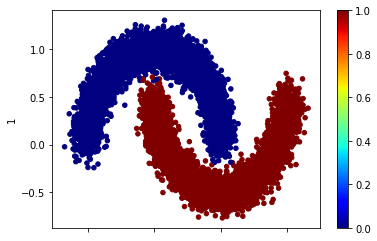

In [24]:
moons_df = pd.DataFrame(data = X)
moons_df.plot.scatter(x = 0, y = 1, c = y, colormap="jet")

# K means clustering
[sklearn.cluster.KMeans reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## The elbow method (inertia)

In [29]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(moons_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

NameError: ignored

## Predictions

In [ ]:
from sklearn.cluster import KMeans

plot_kmeans_y(samples = 10000, noise=0, nclusters=6)
plot_kmeans_y(samples = 10000, noise=0.01, nclusters=6)
plot_kmeans_y(samples = 10000, noise=0.1, nclusters=6)
plot_kmeans_y(samples = 10000, noise=1, nclusters=6)

# Density-based scan
[sklearn.cluster.DBSCAN reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

[How to choose the optimal eps and min_samples?](https://stackoverflow.com/questions/58983528/how-to-find-optimal-parametrs-for-dbscan)

## Clear data (noise set to 0)

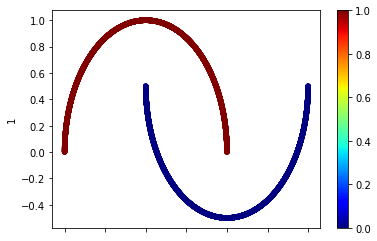

In [13]:
plot_DBS_y(
    samples = 10000, 
    noise = 0,
    model_args = { "eps": 0.5 }, 
    random_state = 42
)

## Noisy data set (noise set to 0.1)

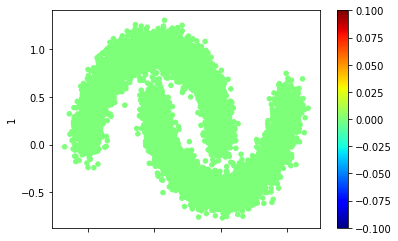

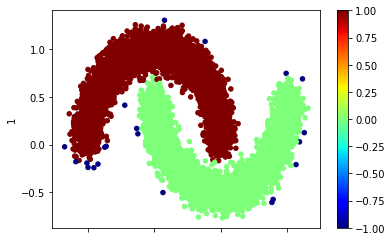

In [34]:
plot_DBS_y(
    samples = 10000, 
    noise = 0.1,
    model_args = { "eps": 0.5, "min_samples": 10 },
    random_state = 42
)
plot_DBS_y(
    samples = 10000, 
    noise = 0.1,
    model_args = { "eps": 0.1, "min_samples": 20 },
    random_state = 42
)

## Very noisy data set (noise set to 1)

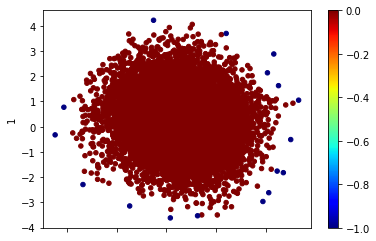

In [28]:
plot_DBS_y(
    samples = 10000, 
    noise = 1,
    model_args = { "eps": 0.5, }, 
    random_state = 42
)